In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
import statsmodels.api as sm

In [61]:
import yfinance as yf
from yahoofinancials import YahooFinancials

In [62]:
df = yf.download('AAPL', 
                      start='2020-01-01', 
                      end='2022-03-30', 
                      progress=False,
)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.245949,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.894325,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.175934,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.759003,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.412125,108872000


In [63]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700
2022-03-24,171.059998,174.139999,170.210007,174.070007,174.070007,90131400
2022-03-25,173.880005,175.279999,172.750000,174.720001,174.720001,80546200
2022-03-28,172.169998,175.729996,172.000000,175.600006,175.600006,90371900
2022-03-29,176.690002,179.009995,176.339996,178.960007,178.960007,100589400


In [64]:
df.index

DatetimeIndex(['2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-21',
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-28', '2022-03-29'],
              dtype='datetime64[ns]', name='Date', length=566, freq=None)

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,566.0,1.232044e+02,3.190079e+01,5.702000e+01,9.676625e+01,1.265450e+02,1.471675e+02,1.826300e+02
High,566.0,1.247292e+02,3.212023e+01,5.712500e+01,9.754750e+01,1.278950e+02,1.486650e+02,1.829400e+02
Low,566.0,1.217546e+02,3.163910e+01,5.315250e+01,9.585625e+01,1.251200e+02,1.458700e+02,1.791200e+02
Close,566.0,1.233203e+02,3.190078e+01,5.609250e+01,9.664187e+01,1.263962e+02,1.469425e+02,1.820100e+02
Adj Close,566.0,1.226123e+02,3.217668e+01,5.533217e+01,9.558997e+01,1.256210e+02,1.464369e+02,1.817784e+02
Volume,566.0,1.210211e+08,6.070097e+07,4.100000e+07,8.154448e+07,1.044896e+08,1.410839e+08,4.265100e+08


<AxesSubplot:xlabel='Date'>

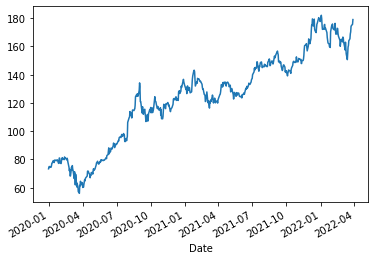

In [66]:
df['Close'].plot()

In [67]:
time_series = df['Close']

In [68]:
type(time_series)

pandas.core.series.Series

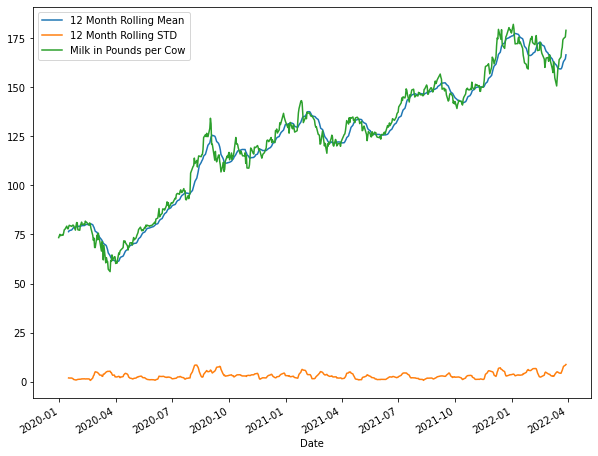

In [69]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean',figsize=(10,8))
time_series.rolling(12).std().plot(label='12 Month Rolling STD')
time_series.plot(label='Milk in Pounds per Cow')
plt.legend();

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [71]:
decomp = seasonal_decompose(time_series,period=30)

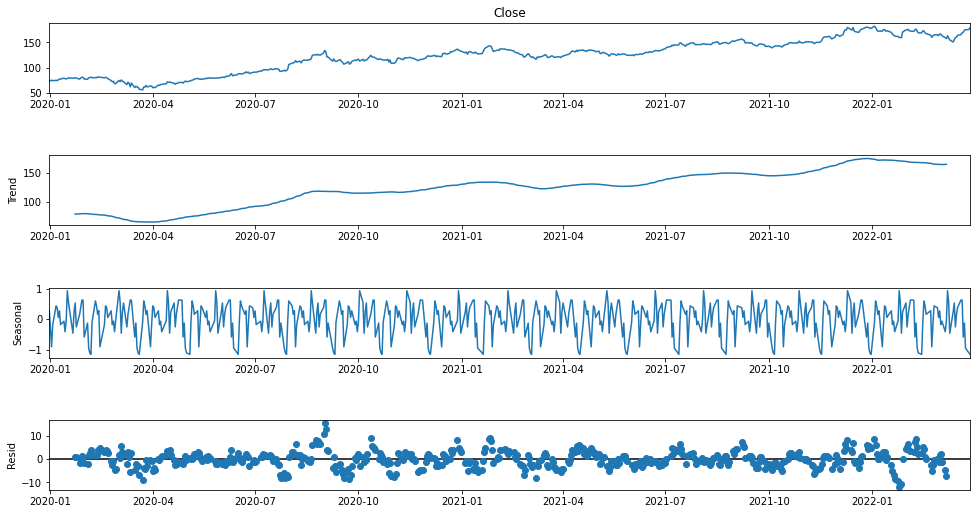

In [72]:
fig=decomp.plot()
fig.set_size_inches(15,8)

In [73]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.245949,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.894325,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.175934,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.759003,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.412125,108872000


### Dicky Fuller Test
Test if data is stationary or not

In [74]:
from statsmodels.tsa.stattools import adfuller

In [75]:
result = adfuller(df['Close'])

In [76]:
result

(-0.7742259913418417,
 0.826576011020309,
 0,
 565,
 {'1%': -3.4419770063102213,
  '5%': -2.866669060591297,
  '10%': -2.5695016312945413},
 2569.968188841891)

In [77]:
def adf_check(time_series):
    
    result=adfuller(time_series)
    print(" Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic','p-value','# of lags','Num of Obseravtions used']
    
    for value,label in zip(result,labels):
        print(label+" : "+str(value))
        
    if result[1]<=0.05:
        print("Strong evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root, it is non-stationary")

In [78]:
adf_check(df['Close'])

 Augmented Dicky-Fuller Test
ADF Test Statistic : -0.7742259913418417
p-value : 0.826576011020309
# of lags : 0
Num of Obseravtions used : 565
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [79]:
df['First Difference'] = df['Close'] - df['Close'].shift()

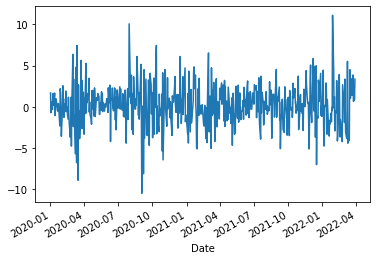

In [80]:
df['First Difference'].plot();

In [81]:
adf_check(df['First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -24.94200099061074
p-value : 0.0
# of lags : 0
Num of Obseravtions used : 564
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


#### The above shows the data is stationary as p-value is < 0.05

In [82]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

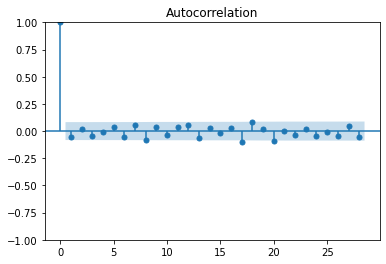

In [83]:
fig_first = plot_acf(df['First Difference'].dropna())

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


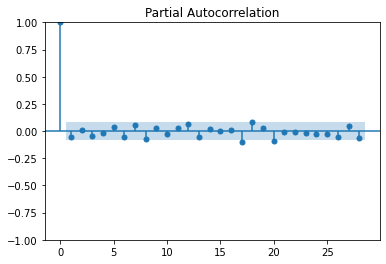

In [84]:
result = plot_pacf(df['First Difference'].dropna())

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


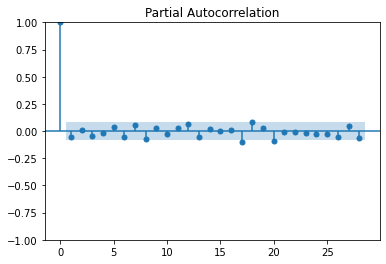

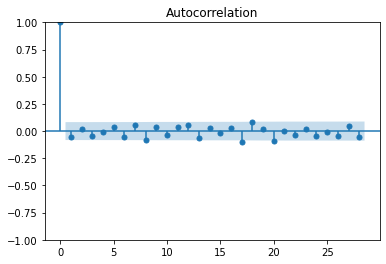

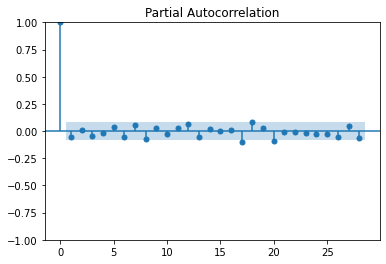

In [85]:
plot_acf(df['First Difference'].dropna())
plot_pacf(df['First Difference'].dropna())

In [86]:
from statsmodels.tsa.arima_model import ARIMA

In [87]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(*args, **kwargs)
 |  
 |  ARIMA has been deprecated in favor of the new implementation
 |  
 |  See Also
 |  --------
 |  statsmodels.tsa.arima.model.ARIMA
 |      ARIMA models with a variety of parameter estimators
 |  statsmodels.tsa.statespace.SARIMAX
 |      SARIMAX models estimated using MLE
 |  
 |  Method resolution order:
 |      ARIMA
 |      ARMA
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from ARMA:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [88]:
#Modeling
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
model = ARIMA(df['Close'], order=(0, 1, 0))  
results = model.fit()  
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  566
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1321.776
Date:                Mon, 11 Apr 2022   AIC                           2645.553
Time:                        00:03:47   BIC                           2649.890
Sample:                             0   HQIC                          2647.246
                                - 566                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.3027      0.277     22.767      0.000       5.760       6.845
Ljung-Box (L1) (Q):                   1.52   Jarque-Bera (JB):                67.74
Prob(Q):                              0.22   Pr

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [89]:
results.resid

Date
2019-12-31    73.412498
2020-01-02     1.675003
2020-01-03    -0.730003
2020-01-06     0.592499
2020-01-07    -0.352493
                ...    
2022-03-23     1.389999
2022-03-24     3.860001
2022-03-25     0.649994
2022-03-28     0.880005
2022-03-29     3.360001
Length: 566, dtype: float64

<AxesSubplot:xlabel='Date'>

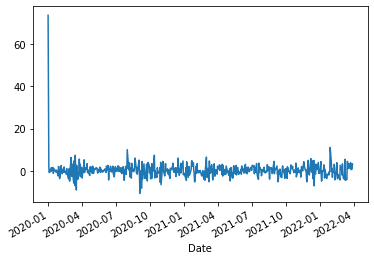

In [90]:
results.resid.plot()

<AxesSubplot:ylabel='Density'>

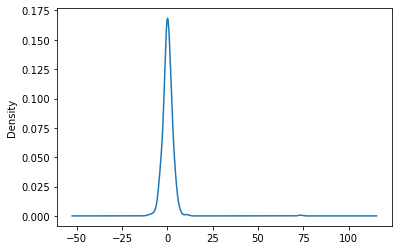

In [91]:
results.resid.plot(kind='kde')

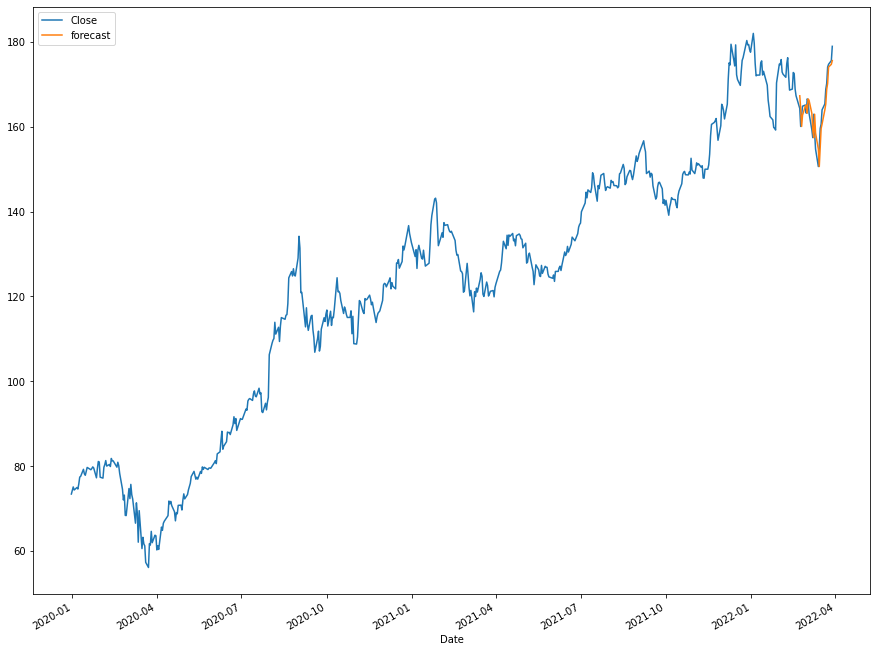

In [92]:
df['forecast'] = results.predict(start=540,end=565)
df[['Close','forecast']].plot(figsize=(15,12))
plt.legend(loc='upper left')

In [93]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,First Difference,forecast
Date,,,,,,,,
2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700,1.389999,168.820007
2022-03-24,171.059998,174.139999,170.210007,174.070007,174.070007,90131400,3.860001,170.210007
2022-03-25,173.880005,175.279999,172.750000,174.720001,174.720001,80546200,0.649994,174.070007
2022-03-28,172.169998,175.729996,172.000000,175.600006,175.600006,90371900,0.880005,174.720001
2022-03-29,176.690002,179.009995,176.339996,178.960007,178.960007,100589400,3.360001,175.600006


In [94]:
from pandas.tseries.offsets import DateOffset

In [95]:
future_dates = [df.index[-1]+DateOffset(days=x) for x in range(1,24)]

In [96]:
future_dates

[Timestamp('2022-03-30 00:00:00'),
 Timestamp('2022-03-31 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-04-02 00:00:00'),
 Timestamp('2022-04-03 00:00:00'),
 Timestamp('2022-04-04 00:00:00'),
 Timestamp('2022-04-05 00:00:00'),
 Timestamp('2022-04-06 00:00:00'),
 Timestamp('2022-04-07 00:00:00'),
 Timestamp('2022-04-08 00:00:00'),
 Timestamp('2022-04-09 00:00:00'),
 Timestamp('2022-04-10 00:00:00'),
 Timestamp('2022-04-11 00:00:00'),
 Timestamp('2022-04-12 00:00:00'),
 Timestamp('2022-04-13 00:00:00'),
 Timestamp('2022-04-14 00:00:00'),
 Timestamp('2022-04-15 00:00:00'),
 Timestamp('2022-04-16 00:00:00'),
 Timestamp('2022-04-17 00:00:00'),
 Timestamp('2022-04-18 00:00:00'),
 Timestamp('2022-04-19 00:00:00'),
 Timestamp('2022-04-20 00:00:00'),
 Timestamp('2022-04-21 00:00:00')]

In [97]:
future_df = pd.DataFrame(index=future_dates,columns=df.columns)

In [98]:
future_df

,Open,High,Low,Close,Adj Close,Volume,First Difference,forecast
2022-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
final_df = pd.concat([df,future_df])

In [100]:
final_df.head()

,Open,High,Low,Close,Adj Close,Volume,First Difference,forecast
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.245949,100805600,NaN,NaN
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.894325,135480400,1.675003,NaN
2020-01-03,74.287498,75.144997,74.125,74.357498,73.175934,146322800,-0.730003,NaN
2020-01-06,73.447502,74.989998,73.1875,74.949997,73.759003,118387200,0.592499,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.412125,108872000,-0.352493,NaN


In [101]:
final_df.tail()

,Open,High,Low,Close,Adj Close,Volume,First Difference,forecast
2022-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
final_df.shape

(589, 8)

In [103]:
df.shape

(566, 8)

In [104]:
final_df['forecast'] = results.predict(start=566,end=570)

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [105]:
final_df.tail(30)

,Open,High,Low,Close,Adj Close,Volume,First Difference,forecast
2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400,1.400009,NaN
2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000,3.440002,NaN
2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700,1.389999,NaN
2022-03-24,171.059998,174.139999,170.210007,174.070007,174.070007,90131400,3.860001,NaN
2022-03-25,173.880005,175.279999,172.75,174.720001,174.720001,80546200,0.649994,NaN
2022-03-28,172.169998,175.729996,172.0,175.600006,175.600006,90371900,0.880005,NaN
2022-03-29,176.690002,179.009995,176.339996,178.960007,178.960007,100589400,3.360001,NaN
2022-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
final_df.head()

,Open,High,Low,Close,Adj Close,Volume,First Difference,forecast
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.245949,100805600,NaN,NaN
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.894325,135480400,1.675003,NaN
2020-01-03,74.287498,75.144997,74.125,74.357498,73.175934,146322800,-0.730003,NaN
2020-01-06,73.447502,74.989998,73.1875,74.949997,73.759003,118387200,0.592499,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.412125,108872000,-0.352493,NaN


<AxesSubplot:>

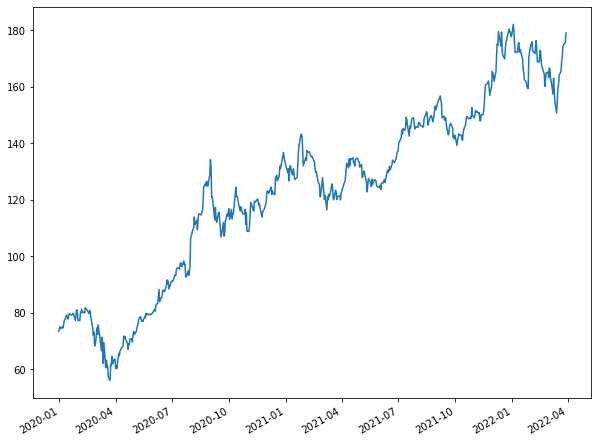

In [107]:
final_df['Close'].plot(figsize=(10,8))
final_df['forecast'].plot()

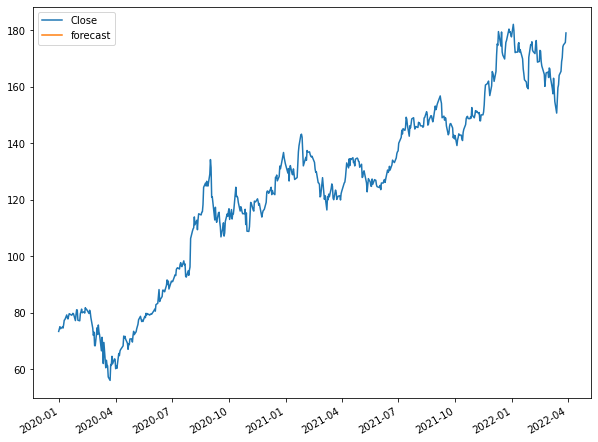

In [108]:
final_df[['Close','forecast']].plot(figsize=(10,8));